This jupyter notebook is prepared by name

----- Task 1 -----

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msn
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

----- Task 2 -----

In [10]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hrdata.csv")
data.shape

(21287, 18)

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


----- Task 3 -----

In [12]:
data.describe()


,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


every coloum but target seems to have some form of value to it.
city developmont idex is scaled to a 0 to 1 scale

----- Task 4 -----

In [13]:
data.head(20)

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67
5,5,6,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0,CA,7.64
6,6,7,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0,CA,9.20
7,7,8,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0,CA,7.62
8,8,9,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0,CA,9.20
9,9,10,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0,CA,9.20


In [14]:
data.tail(20)

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21267,21267,21268,13962,city_36,0.893,Male,Has relevent experience,no_enrollment,Masters,Humanities,20,50-99,Pvt Ltd,1,26,NaN,CA,8.93
21268,21268,21269,22744,city_24,0.698,NaN,Has relevent experience,no_enrollment,Masters,STEM,15,50-99,Pvt Ltd,>4,157,NaN,CA,6.98
21269,21269,21270,21887,city_16,0.910,Other,No relevent experience,no_enrollment,Graduate,No Major,6,NaN,NaN,1,78,NaN,CA,9.10
21270,21270,21271,28552,city_134,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,4,50-99,Pvt Ltd,1,36,NaN,CA,6.98
21271,21271,21272,10726,city_71,0.884,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Public Sector,1,16,NaN,CA,8.84
21272,21272,21273,6294,city_73,0.754,NaN,Has relevent experience,no_enrollment,High School,NaN,>20,50-99,Pvt Ltd,2,31,NaN,CA,7.54
21273,21273,21274,13833,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,1,8,NaN,CA,6.24
21274,21274,21275,31643,city_75,0.939,Male,Has relevent experience,no_enrollment,High School,NaN,>20,100-500,Public Sector,2,58,NaN,CA,9.39
21275,21275,21276,21500,city_44,0.725,Male,No relevent experience,Part time course,Graduate,STEM,7,<10,Early Stage Startup,never,160,NaN,CA,7.25
21276,21276,21277,33225,city_138,0.836,Male,Has relevent experience,no_enrollment,High School,NaN,14,NaN,NaN,1,42,NaN,CA,8.36


----- Task 5 -----

In [15]:
dataNumeric = data.select_dtypes(include = [np.number])
dataNumeric

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
0,0,1,8949,0.920,36,1.0,9.20
1,1,2,29725,0.776,47,0.0,7.76
2,2,3,11561,0.624,83,0.0,6.24
3,3,4,33241,0.789,52,1.0,7.89
4,4,5,666,0.767,8,0.0,7.67
...,...,...,...,...,...,...,...
21282,21282,21283,1289,0.920,15,NaN,9.20
21283,21283,21284,195,0.897,30,NaN,8.97
21284,21284,21285,31762,0.887,18,NaN,8.87
21285,21285,21286,7873,0.804,84,NaN,8.04


----- Task 6 -----

In [16]:
dataCategorical = data.select_dtypes(include = object)
dataCategorical

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,state
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,CA
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,CA
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,CA
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,CA
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,CA
...,...,...,...,...,...,...,...,...,...,...,...
21282,city_103,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,CA
21283,city_136,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,CA
21284,city_100,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,CA
21285,city_102,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,CA


----- Task 7 -----

In [17]:
# 7.1
nullCount = data.isna().sum()
nullCount.sort_values(ascending = False, inplace = True)
nullCount

company_type                6774
company_size                6560
gender                      5016
major_discipline            3125
target                      2129
education_level              512
last_new_job                 463
enrolled_university          417
experience                    70
state                          0
training_hours                 0
Unnamed: 0                     0
rec_num                        0
relevent_experience            0
city_development_index         0
city                           0
enrollee_id                    0
city_development_matrics       0
dtype: int64

In [18]:
# 7.2
nullPercent = nullCount / data.shape[0] * 100
nullPercent

company_type                31.822239
company_size                30.816931
gender                      23.563677
major_discipline            14.680321
target                      10.001409
education_level              2.405224
last_new_job                 2.175036
enrolled_university          1.958942
experience                   0.328839
state                        0.000000
training_hours               0.000000
Unnamed: 0                   0.000000
rec_num                      0.000000
relevent_experience          0.000000
city_development_index       0.000000
city                         0.000000
enrollee_id                  0.000000
city_development_matrics     0.000000
dtype: float64

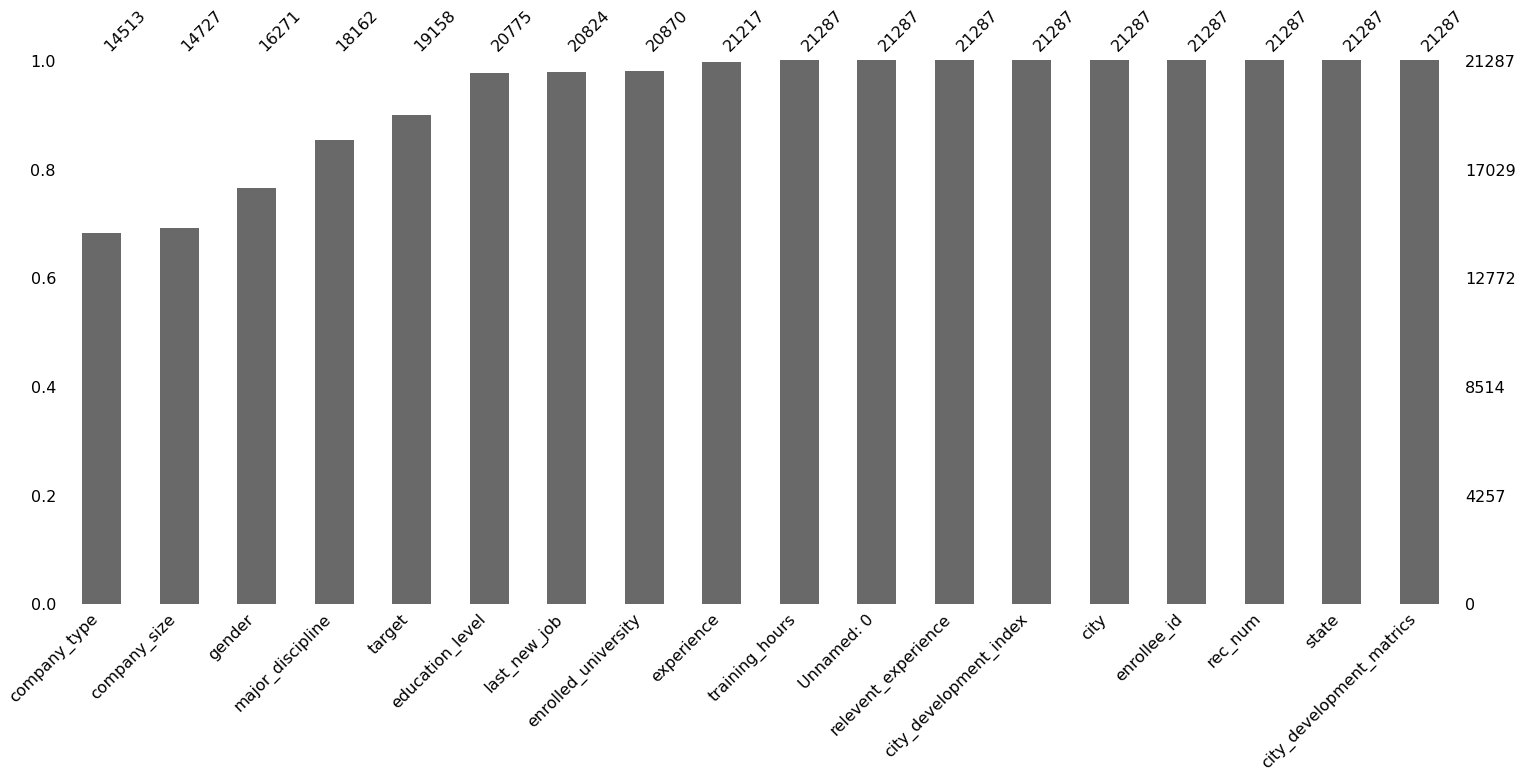

In [19]:
# 7.3
msn.bar(data, sort = 'ascending')

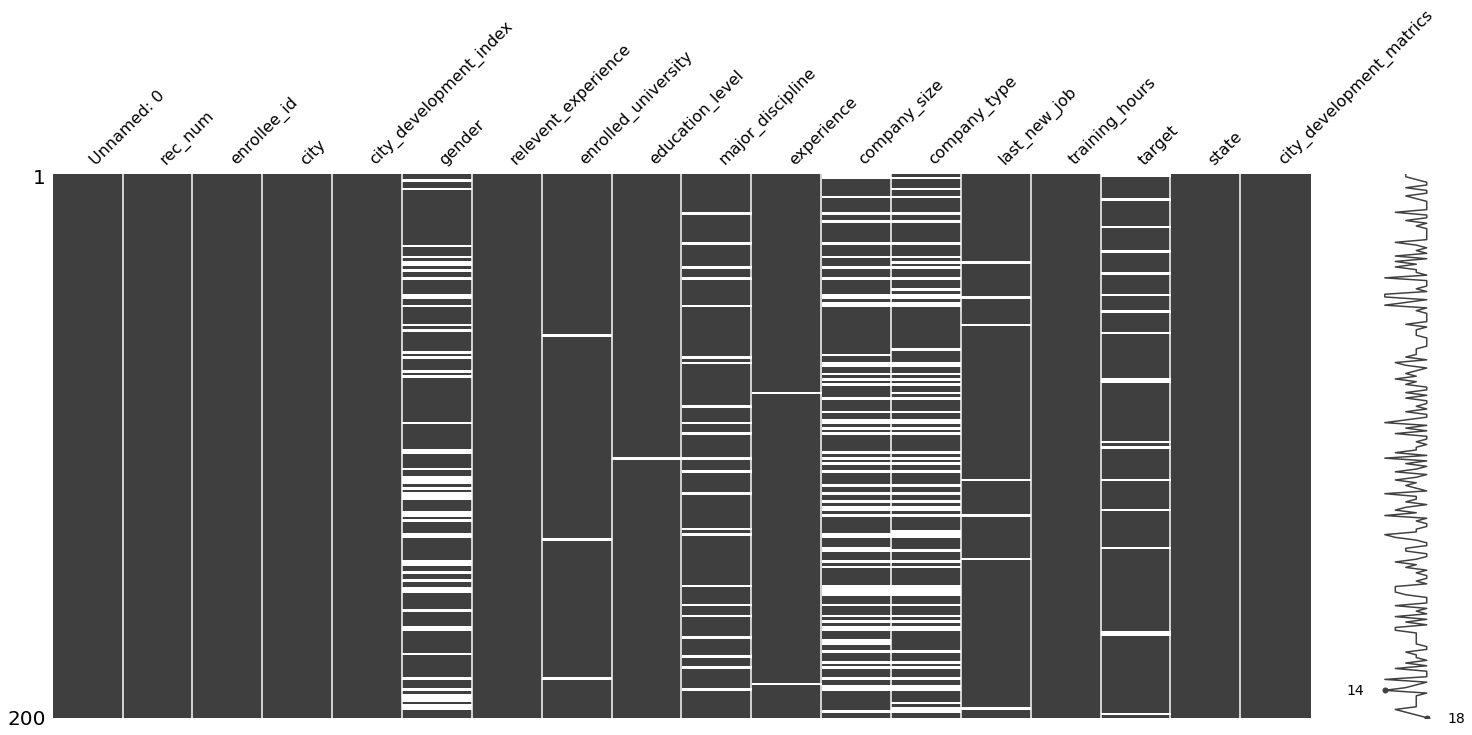

In [20]:
# 7.4
msn.matrix(data.sample(200))

----- Task 8 -----

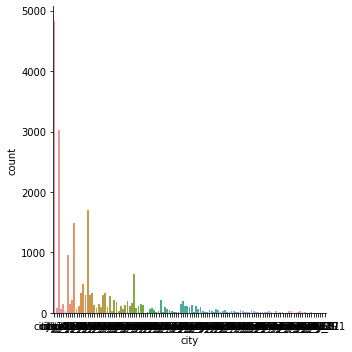

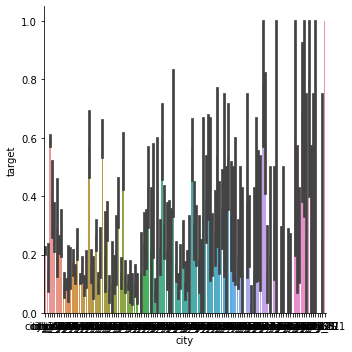

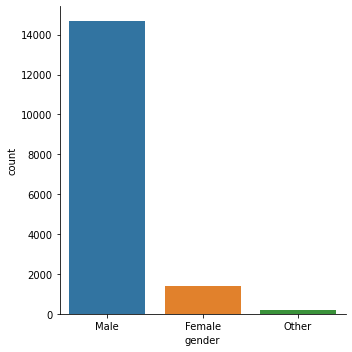

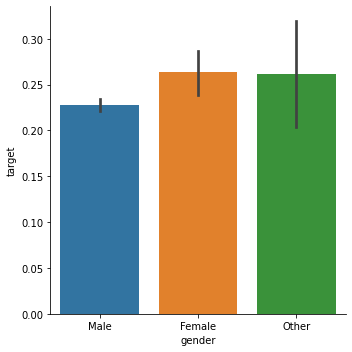

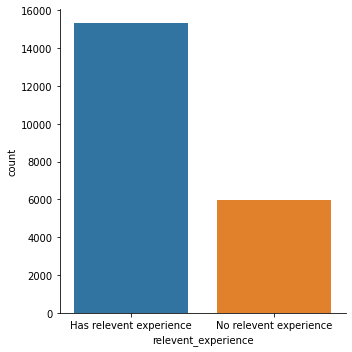

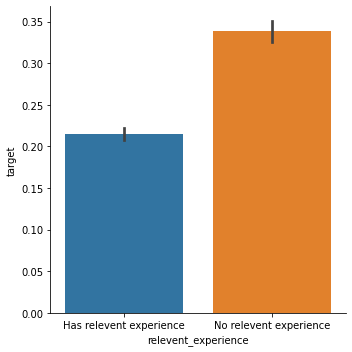

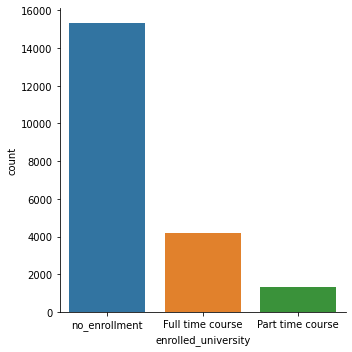

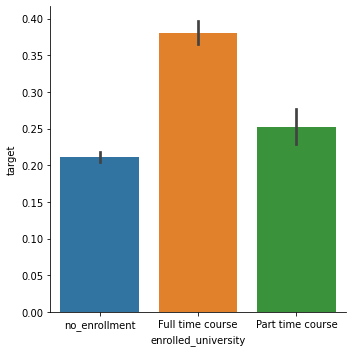

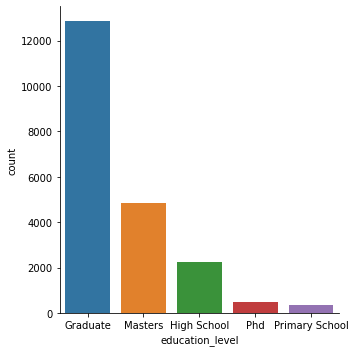

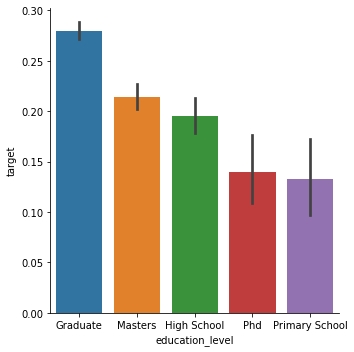

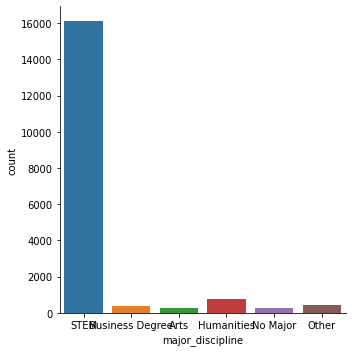

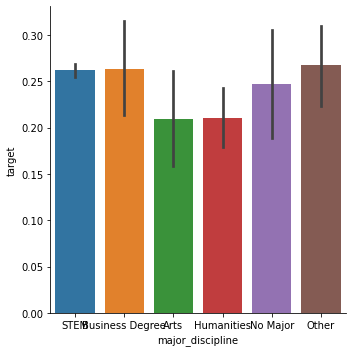

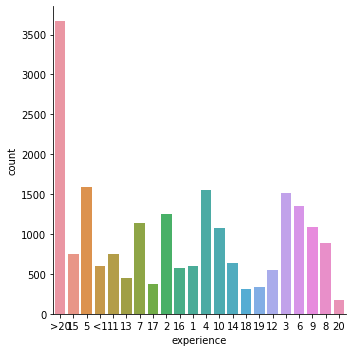

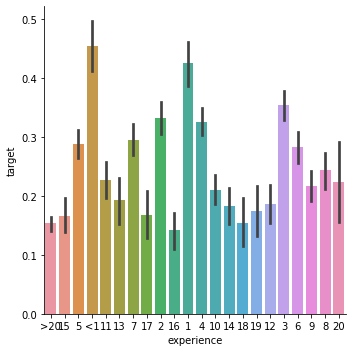

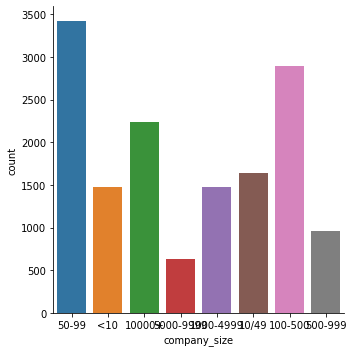

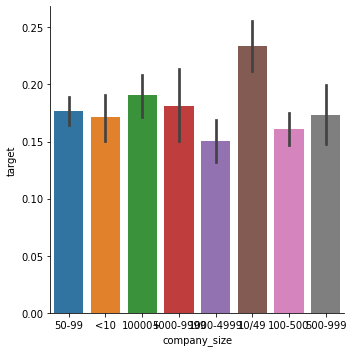

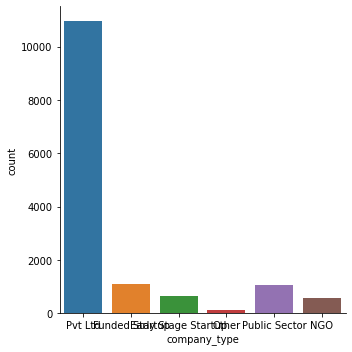

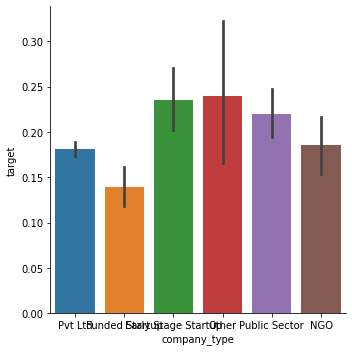

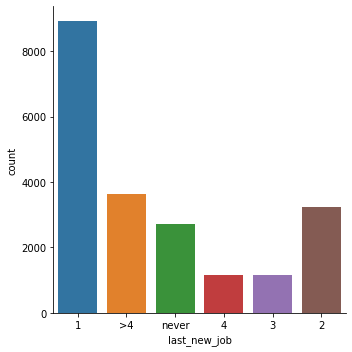

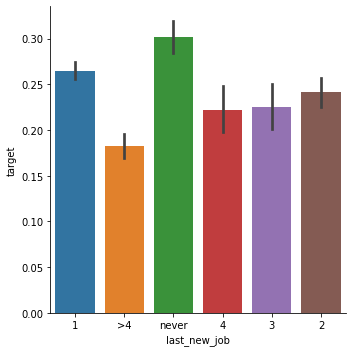

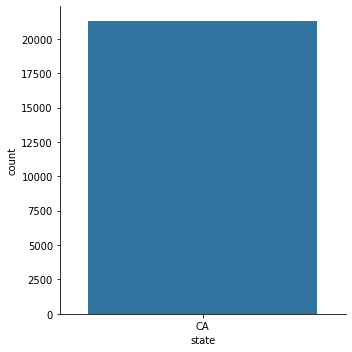

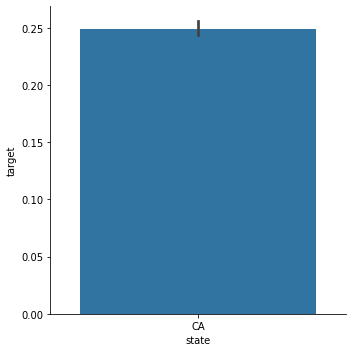

In [21]:
for cName, cData in dataCategorical.iteritems():
	sns.catplot(x = cName, kind = 'count', data = data)
	sns.catplot(x = cName, y = 'target',kind = 'bar', data = data)
	plt.show()

All data is coming from the state of California only so that field is unneccisary 

----- Task 9 -----

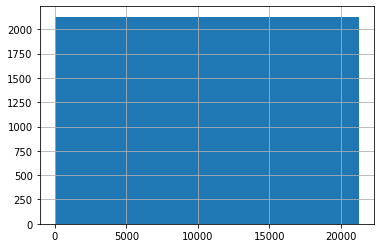

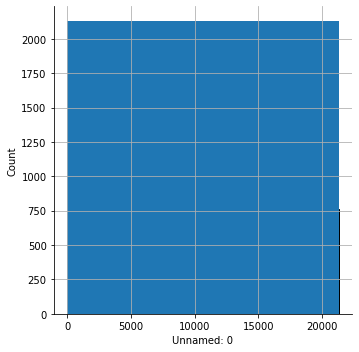

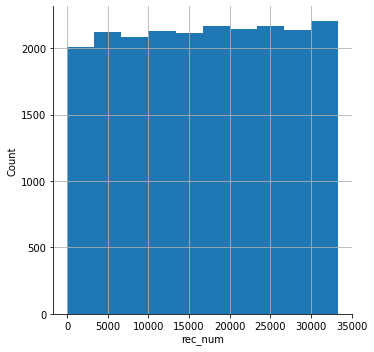

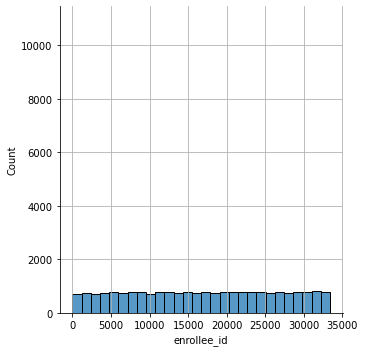

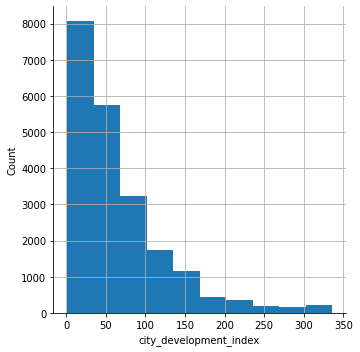

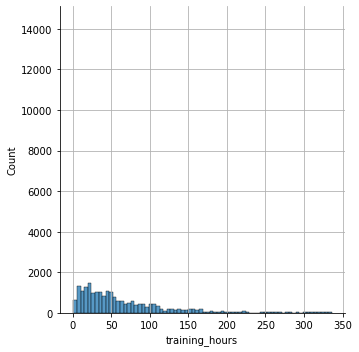

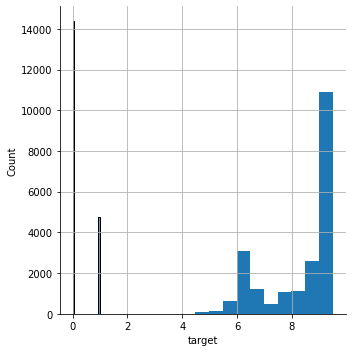

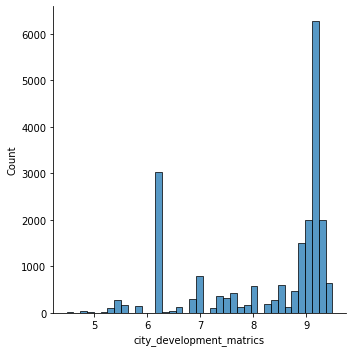

In [22]:
for cName, cData in dataNumeric.iteritems():
	cData.hist()
	plt.show()
	y = data[cName]
	sns.displot(y)
	y.describe()

Rec Number and Enrollment ID are both equally distributed and will not be good as fields to ues in the model

----- Task 10 -----

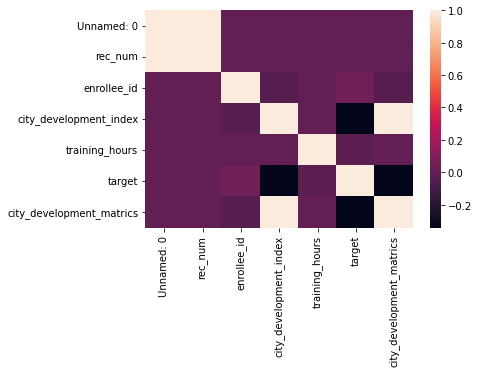

In [23]:
dataNumeric.columns
correlation = dataNumeric.corr()
correlation['target'].sort_values(ascending = False)
sns.heatmap(correlation)

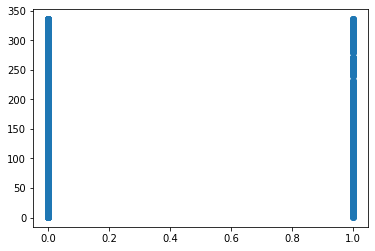

In [24]:
plt.scatter(x = data['target'], y = data['training_hours'])

based on the scatter plot shown above, a scatterplot based on any value vs target will look similar due to target being a binary value

----- Task 11 -----

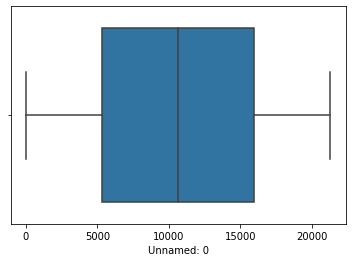

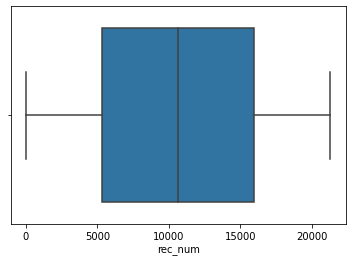

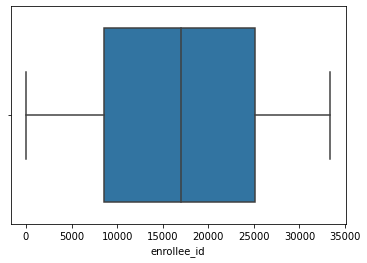

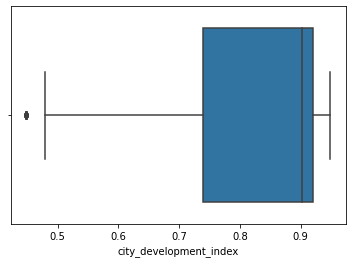

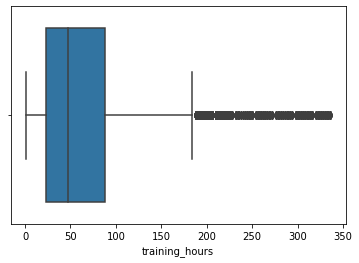

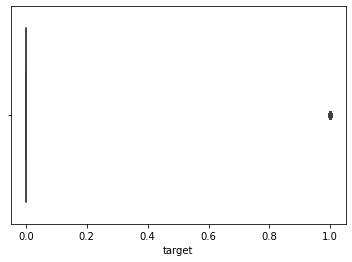

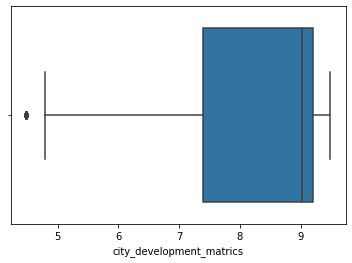

In [25]:
for cName, cData in dataNumeric.iteritems():
	sns.boxplot(x = data[cName])
	plt.show()

----- Task 12 -----

In [26]:
data['experience'] = data['experience'].replace('<1', 0)
data['experience'] = data['experience'].replace('1', 0)
data['experience'] = data['experience'].replace('2', 0)
data['experience'] = data['experience'].replace('3', 0)
data['experience'] = data['experience'].replace('4', 0)
data['experience'] = data['experience'].replace('5', 0)
data['experience'] = data['experience'].replace('6', 0)
data['experience'] = data['experience'].replace('7', 0)
data['experience'] = data['experience'].replace('8', 1)
data['experience'] = data['experience'].replace('9', 1)
data['experience'] = data['experience'].replace('10', 1)
data['experience'] = data['experience'].replace('11', 1)
data['experience'] = data['experience'].replace('12', 1)
data['experience'] = data['experience'].replace('13', 1)
data['experience'] = data['experience'].replace('14', 1)
data['experience'] = data['experience'].replace('15', 2)
data['experience'] = data['experience'].replace('16', 2)
data['experience'] = data['experience'].replace('17', 2)
data['experience'] = data['experience'].replace('18', 2)
data['experience'] = data['experience'].replace('19', 2)
data['experience'] = data['experience'].replace('20', 2)
data['experience'] = data['experience'].replace('>20', 2)
data['experience']
# bin values were caculated by setting each value to a unique value then usind pd.cut with 3 bins


0        2.0
1        2.0
2        0.0
3        0.0
4        2.0
        ... 
21282    2.0
21283    2.0
21284    0.0
21285    0.0
21286    2.0
Name: experience, Length: 21287, dtype: float64

----- Task 13 -----

the following coloums should be removeb as they provide no relevant data to the model
	- rec_number
	- enrollee_id
	- state
